In [1]:
import utils
from utils import IpLoc, TestCircuit
import time
import numpy as np
from pathlib import Path
%matplotlib inline

In [2]:
# Create the initial IpLoc data
chip_resources_path = Path('ZYNQ7000.json')
location_data = IpLoc(chip_resources_path)

In [3]:
# Create the initial IpLoc data
test_circuit_path = Path('IP_configure_temperature.yaml')
test_circuit = TestCircuit(test_circuit_path)

There are a total of 2 IPs in this design.


In [4]:
test_circuit.circuit

{'TMP0': {'IP': 'TMP',
  'IP_specs': {'first_instance_name': 'design_1_i/TMP0/inst/CRO[@inst1].nolabel_line93/LUT6_2_inst',
   'other_instance_names': 'design_1_i/TMP0/inst/CRO[@inst1].NAND/LUT6_inst',
   'feedback_signal': 'design_1_i/TMP0/inst/CRO[@inst1].NAND/in0[0]',
   'Num_Oscillators': 31,
   'Num_Stages': 1}},
 'HEAT': {'IP': 'heater',
  'IP_specs': {'SHE_instance_name': 'design_1_i/heater/inst/SHE_block[@inst1].SHE[@inst2].SHE/LUT6_inst',
   'feedback_signal': 'design_1_i/heater/inst/SHE_block[@inst1].SHE[@inst2].SHE/feedback',
   'num_block': 50,
   'block_size': 32}}}

In [ ]:
blocked_resources = location_data.copy()
for item, x in zip(test_circuit.circuit.keys(), [48, 49, 51, 95, 97, 99]):
    print(item)
    test_circuit.locations[item] = blocked_resources.copy()
    for y in range(0, test_circuit.circuit[item]['IP_specs']['Num_Oscillators']):
        test_circuit.locations[item].remaining_resources[x, 110 + y] = test_circuit.circuit[item]['IP_specs']['Num_Stages'] + 1
        test_circuit.locations[item]._lut_a[x, 110 + y] = y
        test_circuit.locations[item]._lut_b[x, 110 + y] = y
        test_circuit.locations[item]._lut_c[x, 110 + y] = y
        test_circuit.locations[item]._lut_d[x, 110 + y] = y
    test_circuit.locations[item] = utils.check_and_propose(test_circuit.locations[item], 'L')
    blocked_resources = utils.IpLoc.block_resource(blocked_resources, test_circuit.locations[item])
    blocked_resources.plot_layout()
utils.HCI_xdc(test_circuit, slice_type='L', outputfile=f'HCI.XDC', json_output=f'HCI.json')

In [ ]:
test_circuit.locations['HCI2']._lut_a[51,:]

In [ ]:
#Y direction 
resolutions = [1, 2, 5, 10, 20, 50, 80, 110, 120, 140]
num_per_resolutions = 5 
for length in resolutions:
    for bit_num in range(num_per_resolutions):
        blocked_resources = location_data.copy()
        for item in test_circuit.circuit.keys():
            test_circuit.locations[item] = blocked_resources.copy()
            if test_circuit.circuit[item]['IP'] == 'RO':
                Num_Oscillators = test_circuit.circuit[item]['IP_specs']['Num_Oscillators']
                Num_Stages = test_circuit.circuit[item]['IP_specs']['Num_Stages']
                max_x = test_circuit.locations[item].max_x
                max_y = test_circuit.locations[item].max_y
                for i in range(Num_Oscillators):
                    x = np.random.randint(max_x)
                    y = np.random.randint(max_y - length)
                    while (test_circuit.locations[item].remaining_resources[x, y] != 0 or test_circuit.locations[item].remaining_resources[x, y + length] != 0):
                        x = np.random.randint(max_x)
                        y = np.random.randint(max_y - length)
                    y_pos = [y, y, y, y + length]
                    slice_resources = [test_circuit.locations[item]._lut_a, test_circuit.locations[item]._lut_b, test_circuit.locations[item]._lut_c, test_circuit.locations[item]._lut_a]
                    test_circuit.locations[item].remaining_resources[x, y] = 3
                    test_circuit.locations[item].remaining_resources[x, y + length] = 1
                    for j, k in zip(slice_resources, y_pos):
                        j[x, k] = i
                test_circuit.locations[item] = utils.check_and_propose(test_circuit.locations[item], 'L')
                blocked_resources = utils.IpLoc.block_resource(blocked_resources, test_circuit.locations[item])
        blocked_resources.plot_layout()
        utils.RO_xdc(test_circuit, slice_type='L', outputfile=f'RO_resolution_{length}_num_{bit_num}_heater.XDC', json_output=f'RO_resolution_{length}_num_{bit_num}_heater.json')
        
        for item in test_circuit.circuit.keys():
            if test_circuit.circuit[item]['IP'] == 'heater':
                test_circuit.locations[item] = blocked_resources
        blocked_resources = utils.heater_xdc(test_circuit, init_coord=(60, 120), dim=(24, 24), outputfile=f'RO_resolution_{length}_num_{bit_num}_heater.XDC')
        blocked_resources.plot_layout()

In [ ]:
blocked_resources.plot_layout()

In [ ]:
# X direction
resolutions = [1, 2, 5, 10, 20, 50, 80, 100, 105]
num_per_resolutions = 1 
for length in resolutions:
    for bit_num in range(num_per_resolutions):
        blocked_resources = location_data.copy()
        for item in test_circuit.circuit.keys():
            test_circuit.locations[item] = blocked_resources.copy()
            if test_circuit.circuit[item]['IP'] == 'RO':
                Num_Oscillators = test_circuit.circuit[item]['IP_specs']['Num_Oscillators']
                Num_Stages = test_circuit.circuit[item]['IP_specs']['Num_Stages']
                max_x = test_circuit.locations[item].max_x
                max_y = test_circuit.locations[item].max_y
                for i in range(Num_Oscillators):
                    x = np.random.randint(max_x - length)
                    y = np.random.randint(max_y)
                    while (test_circuit.locations[item].remaining_resources[x, y] != 0 or test_circuit.locations[item].remaining_resources[x + length, y] != 0):
                        x = np.random.randint(max_x - length)
                        y = np.random.randint(max_y)
                    x_pos = [x, x, x, x + length]
                    slice_resources = [test_circuit.locations[item]._lut_a, test_circuit.locations[item]._lut_b, test_circuit.locations[item]._lut_c, test_circuit.locations[item]._lut_a]
                    test_circuit.locations[item].remaining_resources[x, y] = 3
                    test_circuit.locations[item].remaining_resources[x + length, y] = 1
                    for j, k in zip(slice_resources, x_pos):
                        j[k, y] = i
                test_circuit.locations[item] = utils.check_and_propose(test_circuit.locations[item], 'L')
                blocked_resources = utils.IpLoc.block_resource(blocked_resources, test_circuit.locations[item])
        blocked_resources.plot_layout()
        utils.RO_xdc(test_circuit, slice_type='L', outputfile=f'RO_resolution_{length}_num_{bit_num}_H_heater.XDC', json_output=f'RO_resolution_{length}_num_{bit_num}_H_heater.json')
        for item in test_circuit.circuit.keys():
            
            if test_circuit.circuit[item]['IP'] == 'heater':
                test_circuit.locations[item] = blocked_resources
        blocked_resources = utils.heater_xdc(test_circuit, init_coord=(60, 120), dim=(24, 24), outputfile=f'RO_resolution_{length}_num_{bit_num}_H_heater.XDC')
        blocked_resources.plot_layout()

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 5838.37it/s]


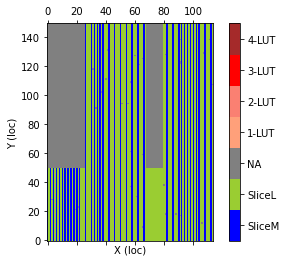

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 8343.38it/s]


Creating location constraints.
Creating location constraints.
Creating location constraints.
Creating location constraints.


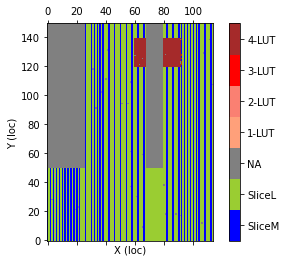

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 4672.04it/s]


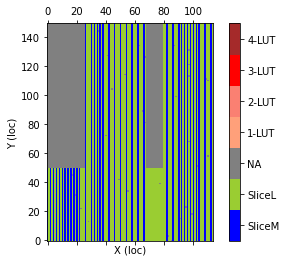

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 8322.90it/s]


Creating location constraints.
Creating location constraints.
Creating location constraints.
Creating location constraints.


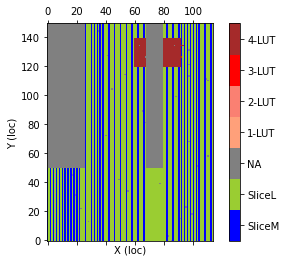

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 6870.77it/s]


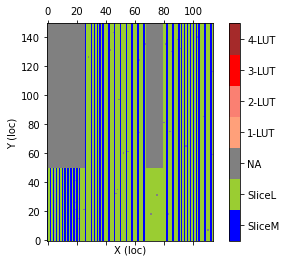

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 5850.15it/s]


Creating location constraints.
Creating location constraints.
Creating location constraints.
Creating location constraints.


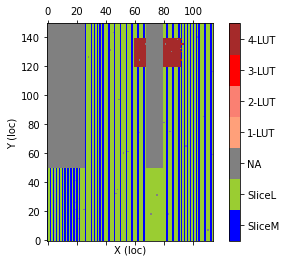

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 5291.15it/s]


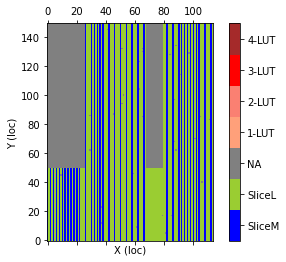

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 7300.12it/s]


Creating location constraints.
Creating location constraints.
Creating location constraints.
Creating location constraints.


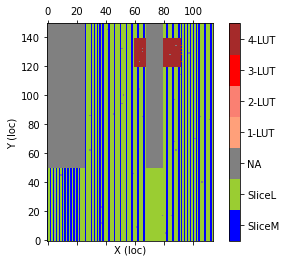

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 3240.82it/s]


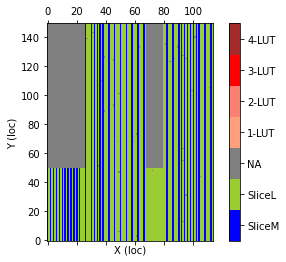

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 8342.94it/s]


Creating location constraints.
Creating location constraints.
Creating location constraints.
Creating location constraints.


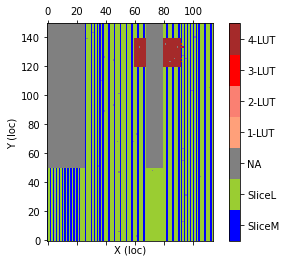

In [6]:
# resolution 0 for temperature sensor
resolutions = [0]
num_per_resolutions = 5 
for length in resolutions:
    for bit_num in range(num_per_resolutions):
        blocked_resources = location_data.copy()
        for item in test_circuit.circuit.keys():
            test_circuit.locations[item] = blocked_resources.copy()
            if test_circuit.circuit[item]['IP'] == 'TMP':
                Num_Oscillators = test_circuit.circuit[item]['IP_specs']['Num_Oscillators']
                max_x = test_circuit.locations[item].max_x
                max_y = test_circuit.locations[item].max_y   
                for i in range(Num_Oscillators):
                    if i < 5:
                        x = np.random.randint(61, 99)
                        y = np.random.randint(121, 139)                            
                    else:
                        x = np.random.randint(max_x)
                        y = np.random.randint(max_y)
                    while (test_circuit.locations[item].remaining_resources[x, y] != 0):
                        if i < 5:
                            x = np.random.randint(61, 99)
                            y = np.random.randint(121, 139)                            
                        else:
                            x = np.random.randint(max_x)
                            y = np.random.randint(max_y)
                    x_pos = [x, x]
                    slice_resources = [test_circuit.locations[item]._lut_b, test_circuit.locations[item]._lut_a] # , test_circuit.locations[item]._lut_c, test_circuit.locations[item]._lut_d]
                    test_circuit.locations[item].remaining_resources[x, y] = 2
                    for j, k in zip(slice_resources, x_pos):
                        j[k, y] = i
                test_circuit.locations[item] = utils.check_and_propose(test_circuit.locations[item], 'L')
                blocked_resources = utils.IpLoc.block_resource(blocked_resources, test_circuit.locations[item])
        blocked_resources.plot_layout()
        utils.TMP_xdc(test_circuit, slice_type='L', outputfile=f'Temperature_sensor_num_{bit_num}.XDC', json_output=f'Temperature_sensor_num_{bit_num}.json')
        for item in test_circuit.circuit.keys():
            
            if test_circuit.circuit[item]['IP'] == 'heater':
                test_circuit.locations[item] = blocked_resources
        blocked_resources = utils.heater_xdc(test_circuit, init_coord=(60, 120), dim=(20, 20), outputfile=f'Temperature_sensor_num_{bit_num}.XDC')
        blocked_resources.plot_layout()

In [18]:
# X direction
resolutions = [0]
num_per_resolutions = 1 
for length in resolutions:
    for bit_num in range(num_per_resolutions):
        blocked_resources = location_data.copy()
        for item in test_circuit.circuit.keys():
            test_circuit.locations[item] = blocked_resources.copy()
            if test_circuit.circuit[item]['IP'] == 'RO':
                Num_Oscillators = test_circuit.circuit[item]['IP_specs']['Num_Oscillators']
                Num_Stages = test_circuit.circuit[item]['IP_specs']['Num_Stages']
                max_x = test_circuit.locations[item].max_x
                max_y = test_circuit.locations[item].max_y
                for i in range(Num_Oscillators):
                    x = np.random.randint(max_x - length)
                    y = np.random.randint(max_y - 8)
                    while (test_circuit.locations[item].remaining_resources[x, y] != 0 or test_circuit.locations[item].remaining_resources[x + length, y] != 0):
                        x = np.random.randint(max_x - length)
                        y = np.random.randint(max_y)
                    x_pos = [x, x, x, x + length]
                    slice_resources = [test_circuit.locations[item]._lut_a, test_circuit.locations[item]._lut_b, test_circuit.locations[item]._lut_c, test_circuit.locations[item]._lut_a]
                    test_circuit.locations[item].remaining_resources[x, y] = 3
                    test_circuit.locations[item].remaining_resources[x + length, y] = 1
                    for j, k in zip(slice_resources, x_pos):
                        j[k, y] = i
                test_circuit.locations[item] = utils.check_and_propose(test_circuit.locations[item], 'L')
                blocked_resources = utils.IpLoc.block_resource(blocked_resources, test_circuit.locations[item])
        blocked_resources.plot_layout()
        utils.RO_xdc(test_circuit, slice_type='L', outputfile=f'RO_resolution_{length}_num_{bit_num}_H_heater.XDC', json_output=f'RO_resolution_{length}_num_{bit_num}_H_heater.json')
        for item in test_circuit.circuit.keys():
            
            if test_circuit.circuit[item]['IP'] == 'heater':
                test_circuit.locations[item] = blocked_resources
        blocked_resources = utils.heater_xdc(test_circuit, init_coord=(60, 120), dim=(24, 24), outputfile=f'RO_resolution_{length}_num_{bit_num}_H_heater.XDC')
        blocked_resources.plot_layout()

1600